In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# **Loading the Data**

In [116]:
df = pd.read_csv("house_price.csv")
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Total Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.0,1,500 sqft,Ready to Move,10 out of 11,1.0,...,NaN,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,NaN,NaN,NaN,500.0,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.0,1,473 sqft,Ready to Move,3 out of 22,1.0,...,1.0,Dosti Vihar Pokhran Road,2,NaN,1 Open,1.0,NaN,473.0,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.0,1,779 sqft,Ready to Move,10 out of 29,1.0,...,1.0,Sunrise by Kalpataru Kolshet Road,2,NaN,1 Covered,1.0,NaN,779.0,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,NaN,1,530 sqft,Ready to Move,1 out of 3,1.0,...,NaN,Kasheli,1,1,NaN,NaN,NaN,530.0,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.0,1,635 sqft,Ready to Move,20 out of 42,1.0,...,2.0,TenX Habitat Raymond Realty Pokhran Road,2,NaN,1 Covered,2.0,NaN,635.0,NaN,NaN


# **DATA PREPROCESSING**

In [117]:
df.shape

(187531, 22)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  177847 non-null  float64
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  int64  
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  float64
 10  Furnishing         184634 non-null  float64
 11  facing             117298 non-null  float64
 12  overlooking        106095 non-null  float64
 13  Society            187531 non-null  object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

# **DUPLICATE VALUES**

In [119]:
df.duplicated().sum()

np.int64(0)

In [120]:
df.drop_duplicates(inplace=True)

# **HANDLING THE MISSING VALUES**

In [121]:
df.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),9684
Price (in rupees),17665
location,0
Carpet Area,80673
Status,615
Floor,7077
Transaction,83


In [122]:
# Drop columns with a high number of missing values REMEMBER TO DROP INDEX
df.drop(columns=['Car Parking', 'Dimensions', 'Plot Area','Super Area','Carpet Area'], inplace=True)

In [123]:
df.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),9684
Price (in rupees),17665
location,0
Status,615
Floor,7077
Transaction,83
Furnishing,2897


In [124]:
#Print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  177847 non-null  float64
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  int64  
 6   Status             186916 non-null  object 
 7   Floor              180454 non-null  object 
 8   Transaction        187448 non-null  float64
 9   Furnishing         184634 non-null  float64
 10  facing             117298 non-null  float64
 11  overlooking        106095 non-null  float64
 12  Society            187531 non-null  object 
 13  Bathroom           186703 non-null  object 
 14  Balcony            138596 non-null  object 
 15  Ownership          122014 non-null  float64
 16  To

In [125]:
 df.nunique()

,0
Index,187531
Title,32446
Description,65634
Amount(in rupees),1559
Price (in rupees),10958
location,81
Status,1
Floor,947
Transaction,4
Furnishing,3


In [126]:
df.drop(columns=['Status'], inplace=True)

In [127]:
print("Summary Statistics")
df.describe()

Summary Statistics


,Index,Amount(in rupees),Price (in rupees),location,Transaction,Furnishing,facing,overlooking,Ownership,Total Area
count,187531.000000,1.778470e+05,1.698660e+05,187531.000000,187448.000000,184634.000000,117298.000000,106095.000000,122014.000000,1.875310e+05
mean,93765.000000,1.198134e+07,7.583772e+03,17.498835,1.234673,1.696741,2.502455,2.600726,1.175586,8.671552e+03
std,54135.681003,3.943827e+07,2.724171e+04,18.294493,0.432702,0.655511,1.779267,1.233710,0.649746,2.940928e+06
min,0.000000,1.000000e+05,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,46882.500000,4.840000e+06,4.297000e+03,7.000000,1.000000,1.000000,1.000000,2.000000,1.000000,8.240000e+02
50%,93765.000000,7.800000e+06,6.034000e+03,12.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.150000e+03
75%,140647.500000,1.450000e+07,9.450000e+03,14.000000,1.000000,2.000000,4.000000,3.000000,1.000000,1.570000e+03
max,187530.000000,1.400300e+10,6.700000e+06,81.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.272096e+09


# **DATA CLEANING**

In [128]:
df.drop(columns=['Index'],inplace=True)

In [129]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

Title
Title
2 BHK Ready to Occupy Flat for sale in Divyasree Elan Sarjapur Road                2106
4 BHK Ready to Occupy Flat for sale in Hamdam Apartment Dwarka Sector 18           1647
2 BHK Ready to Occupy Flat for sale Nayabad                                        1295
3 BHK Ready to Occupy Flat for sale in Shree Vardhman Victoria Sector 70           1147
3 BHK Ready to Occupy Flat for sale Jagatpur                                        986
                                                                                   ... 
3 BHK Ready to Occupy Flat for sale in Savitry Greens ZIRAKPUR                        1
3 BHK Ready to Occupy Flat for sale Hollywood height 1 Zirakpur                       1
3 BHK Ready to Occupy Flat for sale Ishmita homes, Kishanpura, Dhakoli Zirakpur       1
3 BHK Ready to Occupy Flat for sale in Sushma Crescent Phase 2                        1
3 BHK Ready to Occupy Flat for sale in Motia Homes Ambala Highway                     1
Name: count, Length:

In [130]:
# 1. Fill null values in 'Description' with 'Unknown' and 'Facing', 'Overlooking', and 'Ownership' with 0
house_df = df.copy()
cols_to_fill_unknown = ['Description']
house_df[cols_to_fill_unknown] = house_df[cols_to_fill_unknown].fillna('Unknown')

cols_to_fill_zero = ['facing', 'overlooking', 'Ownership']
house_df[cols_to_fill_zero] = house_df[cols_to_fill_zero].fillna('0')
house_df['facing'] = house_df['facing'].astype(int)
house_df['overlooking'] = house_df['overlooking'].astype(int)
house_df['Ownership'] = house_df['Ownership'].astype(int)

# 2. Fill null values in 'Price (in rupees)' with mean value
mean_price = house_df['Price (in rupees)'].mean()
house_df['Price (in rupees)'] = house_df['Price (in rupees)'].fillna(mean_price)

# 2.1 Fill null values in 'Amount (in rupees)' with mean value
mean_amount = house_df['Amount(in rupees)'].mean()
house_df['Amount(in rupees)'] = house_df['Amount(in rupees)'].fillna(mean_amount)

# 3. Replace null values in 'Status', 'Transaction', and 'Furnishing' columns with mode (most common)
cols_to_fill_mode = ['Transaction', 'Furnishing']
for col in cols_to_fill_mode:
    mode_val = house_df[col].mode().iloc[0]
    house_df[col] = house_df[col].fillna(mode_val)

# Bathroom
# Αντικατάσταση τιμών '> 10' με 11
house_df.loc[house_df['Bathroom'] == '> 10', 'Bathroom'] = 11

# Μετατροπή της στήλης 'Bathroom' σε αριθμητική τιμή (int ή float)
house_df['Bathroom'] = pd.to_numeric(house_df['Bathroom'], errors='coerce')

# Τώρα μπορείς να υπολογίσεις τον μέσο όρο, καθώς η στήλη είναι αριθμητική
mean_bathroom = house_df['Bathroom'].mean()

# Γέμισμα των NaN τιμών με τον μέσο όρο
house_df['Bathroom'] = house_df['Bathroom'].fillna(mean_bathroom)

# Αν θέλεις, μπορείς να μετατρέψεις σε ακέραιο τύπο (int) αφού γίνουν οι τροποποιήσεις
house_df['Bathroom'] = house_df['Bathroom'].astype(int)

# Balcony
# Αντικατάσταση τιμών '> 10' με 11
house_df.loc[house_df['Balcony'] == '> 10', 'Balcony'] = 11

# Μετατροπή της στήλης 'Balcony' σε αριθμητική τιμή (int ή float)
house_df['Balcony'] = pd.to_numeric(house_df['Balcony'], errors='coerce')

# Τώρα μπορείς να υπολογίσεις τον μέσο όρο, καθώς η στήλη είναι αριθμητική
mean_balcony = house_df['Balcony'].mean()

# Γέμισμα των NaN τιμών με τον μέσο όρο
house_df['Balcony'] = house_df['Balcony'].fillna(mean_balcony)

# Αν θέλεις, μπορείς να μετατρέψεις σε ακέραιο τύπο (int) αφού γίνουν οι τροποποιήσεις
house_df['Balcony'] = house_df['Balcony'].astype(int)

# 4. Process the 'Floor' column: Split into current floor and maximum floor
def split_floor_column(floor):
    if isinstance(floor, str):  # Check if the floor value is a string
        # Handle 'Ground' separately by setting current floor to 0 and maximum floor to the number after 'out of'
        if "Ground" in floor:
            parts = floor.split(' out of ')
            return 0, int(parts[1].strip()) if len(parts) == 2 else None
        # Handle 'Upper Basement' by setting current floor to -1 and maximum floor to the number after 'out of'
        elif "Upper Basement" in floor:
            parts = floor.split(' out of ')
            return -1, int(parts[1].strip()) if len(parts) == 2 else None
        # Handle 'Lower Basement' by setting current floor to -2 and maximum floor to the number after 'out of'
        elif "Lower Basement" in floor:
            parts = floor.split(' out of ')
            return -2, int(parts[1].strip()) if len(parts) == 2 else None
        elif 'out of' in floor:  # Standard case with 'out of'
            parts = floor.split(' out of ')
            # Ensure both parts exist before converting
            if len(parts) == 2:
                try:
                    return int(parts[0].strip()), int(parts[1].strip())
                except ValueError:
                    return None, None  # In case the parts cannot be converted to integers
    return None, None  # Return None for non-string or malformed floor values

# Apply the function to split the 'Floor' column
house_df[['current floor', 'maximum floor']] = house_df['Floor'].apply(lambda x: pd.Series(split_floor_column(x)))

# Verify if all null values have been handled
print(house_df.isnull().sum())




Title                   0
Description             0
Amount(in rupees)       0
Price (in rupees)       0
location                0
Floor                7077
Transaction             0
Furnishing              0
facing                  0
overlooking             0
Society                 0
Bathroom                0
Balcony                 0
Ownership               0
Total Area              0
current floor        7121
maximum floor        7126
dtype: int64


In [131]:
house_df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Ownership,Total Area,current floor,maximum floor
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,1,10 out of 11,1.0,1.0,0,0,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,0,500.0,10.0,11.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,1,3 out of 22,1.0,2.0,1,1,Dosti Vihar Pokhran Road,2,2,1,473.0,3.0,22.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,1,10 out of 29,1.0,1.0,1,1,Sunrise by Kalpataru Kolshet Road,2,2,1,779.0,10.0,29.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,1,1 out of 3,1.0,1.0,0,0,Kasheli,1,1,0,530.0,1.0,3.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,1,20 out of 42,1.0,1.0,2,2,TenX Habitat Raymond Realty Pokhran Road,2,2,2,635.0,20.0,42.0


In [132]:
# Fill null values in 'current floor' and 'maximum floor' with their mean
mean_current_floor = house_df['current floor'].mean()
mean_maximum_floor = house_df['maximum floor'].mean()

# Fill the NaN values in both columns with their respective means
house_df['current floor'] = house_df['current floor'].fillna(mean_current_floor)
house_df['maximum floor'] = house_df['maximum floor'].fillna(mean_maximum_floor)

# Verify if all null values have been handled
print(house_df.isnull().sum())


Title                   0
Description             0
Amount(in rupees)       0
Price (in rupees)       0
location                0
Floor                7077
Transaction             0
Furnishing              0
facing                  0
overlooking             0
Society                 0
Bathroom                0
Balcony                 0
Ownership               0
Total Area              0
current floor           0
maximum floor           0
dtype: int64


In [133]:
# Drop columns with a high number of missing values
house_df.drop(columns=['Floor'], inplace=True)

In [134]:
print(house_df.isnull().sum())

Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Ownership            0
Total Area           0
current floor        0
maximum floor        0
dtype: int64


In [135]:
house_df

,Title,Description,Amount(in rupees),Price (in rupees),location,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Ownership,Total Area,current floor,maximum floor
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,1,1.0,1.0,0,0,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,0,500.0,10.0,11.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,1,1.0,2.0,1,1,Dosti Vihar Pokhran Road,2,2,1,473.0,3.0,22.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,1,1.0,1.0,1,1,Sunrise by Kalpataru Kolshet Road,2,2,1,779.0,10.0,29.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,1,1.0,1.0,0,0,Kasheli,1,1,0,530.0,1.0,3.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,1,1.0,1.0,2,2,TenX Habitat Raymond Realty Pokhran Road,2,2,2,635.0,20.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,6300000.0,3225.000000,81,2.0,2.0,1,1,Bollywood Esencia Gazipur,3,3,1,1953.0,2.0,4.0
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,5500000.0,3274.000000,81,1.0,1.0,3,2,Sushma Urban Views ZIRAKPUR,3,2,0,1680.0,4.0,6.0
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",7600000.0,4343.000000,81,1.0,3.0,1,2,Bollywood Esencia Gazipur,3,2,1,1250.0,1.0,3.0
187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,3000000.0,4231.000000,81,1.0,2.0,0,3,Friends Enclave Kishanpura,2,2,0,709.0,2.0,2.0


In [136]:
house_df.duplicated().sum()

np.int64(119339)

In [137]:
house_df.drop_duplicates(inplace=True)

In [138]:
house_df.shape

(68192, 16)

In [139]:
df = house_df.copy()

In [140]:
df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Ownership,Total Area,current floor,maximum floor
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,1,1.0,1.0,0,0,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,0,500.0,10.0,11.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,1,1.0,2.0,1,1,Dosti Vihar Pokhran Road,2,2,1,473.0,3.0,22.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,1,1.0,1.0,1,1,Sunrise by Kalpataru Kolshet Road,2,2,1,779.0,10.0,29.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,1,1.0,1.0,0,0,Kasheli,1,1,0,530.0,1.0,3.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,1,1.0,1.0,2,2,TenX Habitat Raymond Realty Pokhran Road,2,2,2,635.0,20.0,42.0


In [141]:
df[['Amount(in rupees)','Total Area']]

,Amount(in rupees),Total Area
0,4200000.0,500.0
1,9800000.0,473.0
2,14000000.0,779.0
3,2500000.0,530.0
4,16000000.0,635.0
...,...,...
187526,6300000.0,1953.0
187527,5500000.0,1680.0
187528,7600000.0,1250.0
187529,3000000.0,709.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68192 entries, 0 to 187530
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              68192 non-null  object 
 1   Description        68192 non-null  object 
 2   Amount(in rupees)  68192 non-null  float64
 3   Price (in rupees)  68192 non-null  float64
 4   location           68192 non-null  int64  
 5   Transaction        68192 non-null  float64
 6   Furnishing         68192 non-null  float64
 7   facing             68192 non-null  int64  
 8   overlooking        68192 non-null  int64  
 9   Society            68192 non-null  object 
 10  Bathroom           68192 non-null  int64  
 11  Balcony            68192 non-null  int64  
 12  Ownership          68192 non-null  int64  
 13  Total Area         68192 non-null  float64
 14  current floor      68192 non-null  float64
 15  maximum floor      68192 non-null  float64
dtypes: float64(7), int64(6), o

In [143]:
df.describe()

,Amount(in rupees),Price (in rupees),location,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership,Total Area,current floor,maximum floor
count,6.819200e+04,6.819200e+04,68192.000000,68192.000000,68192.000000,68192.000000,68192.000000,68192.000000,68192.000000,68192.000000,6.819200e+04,68192.000000,68192.000000
mean,1.073518e+07,6.873709e+03,30.821460,1.257567,1.715216,1.538685,1.498988,2.408347,2.062720,0.818424,2.166856e+04,4.316393,8.531152
std,6.155574e+07,4.257985e+04,24.479552,0.439505,0.686353,1.886236,1.600573,0.897524,0.866681,0.894910,4.877012e+06,4.354228,6.827123
min,1.000000e+05,0.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,-2.000000,1.000000
25%,4.200000e+06,3.957750e+03,9.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,8.300000e+02,2.000000,4.000000
50%,6.600000e+06,5.357000e+03,26.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.130000e+03,3.000000,6.000000
75%,1.198134e+07,7.583772e+03,49.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.515250e+03,5.000000,12.000000
max,1.400300e+10,6.700000e+06,81.000000,4.000000,3.000000,8.000000,7.000000,11.000000,11.000000,4.000000,1.272096e+09,200.000000,200.000000


In [144]:
df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Ownership,Total Area,current floor,maximum floor
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,1,1.0,1.0,0,0,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,0,500.0,10.0,11.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,1,1.0,2.0,1,1,Dosti Vihar Pokhran Road,2,2,1,473.0,3.0,22.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,1,1.0,1.0,1,1,Sunrise by Kalpataru Kolshet Road,2,2,1,779.0,10.0,29.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,1,1.0,1.0,0,0,Kasheli,1,1,0,530.0,1.0,3.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,1,1.0,1.0,2,2,TenX Habitat Raymond Realty Pokhran Road,2,2,2,635.0,20.0,42.0


In [145]:
df.duplicated().sum()

np.int64(0)

In [146]:
df.dtypes

,0
Title,object
Description,object
Amount(in rupees),float64
Price (in rupees),float64
location,int64
Transaction,float64
Furnishing,float64
facing,int64
overlooking,int64
Society,object


# **EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


 **WORD CLOUD**

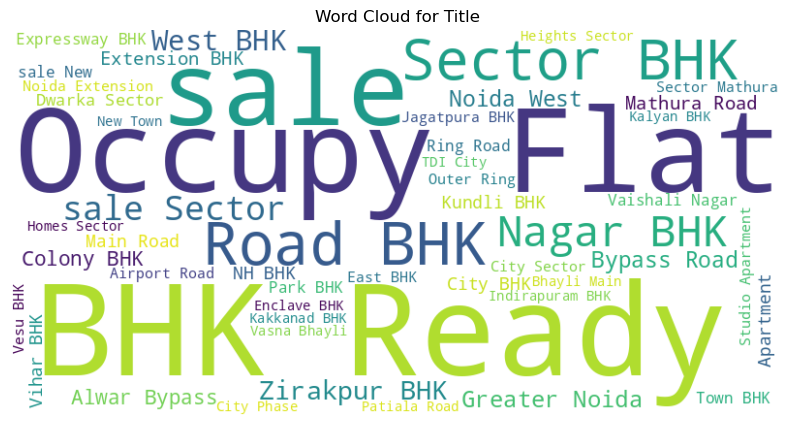

In [ ]:
# Word Cloud for 'Title'
from wordcloud import WordCloud
title_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(' '.join(df['Title']))
plt.figure(figsize=(10, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Title')
plt.axis('off')
plt.show()

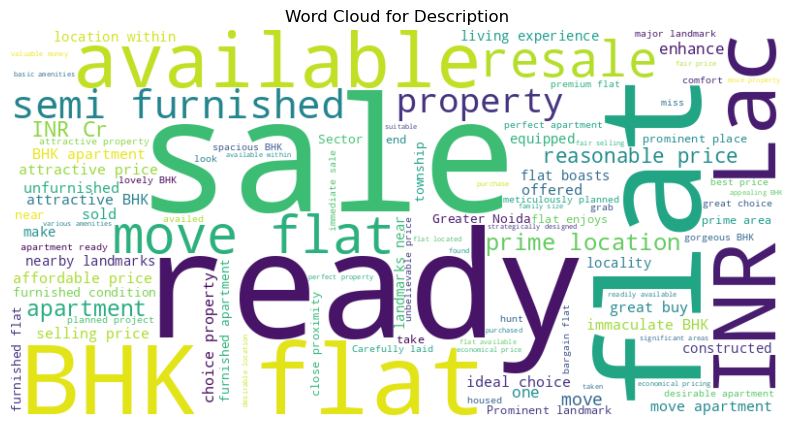

In [ ]:
# Word Cloud for 'Description'
desc_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(df['Description']))
plt.figure(figsize=(10, 6))
plt.imshow(desc_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Description')
plt.axis('off')
plt.show()

# **UNIVARIATE ANALYSIS**

**BOXPLOT**

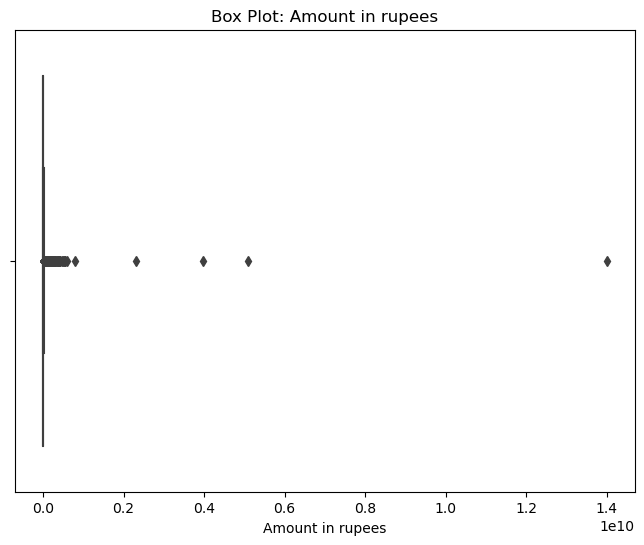

In [ ]:
# Box Plot for 'Amount in rupees'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amount in rupees', data=df)
plt.title("Box Plot: Amount in rupees")
plt.xlabel("Amount in rupees")
plt.show()

**HISTOGRAM**

Summary statistics for column Amount in rupees
count    6.524800e+04
mean     1.067952e+07
std      6.292855e+07
min      1.000000e+05
25%      4.100000e+06
50%      6.500000e+06
75%      1.090000e+07
max      1.400300e+10
Name: Amount in rupees, dtype: float64


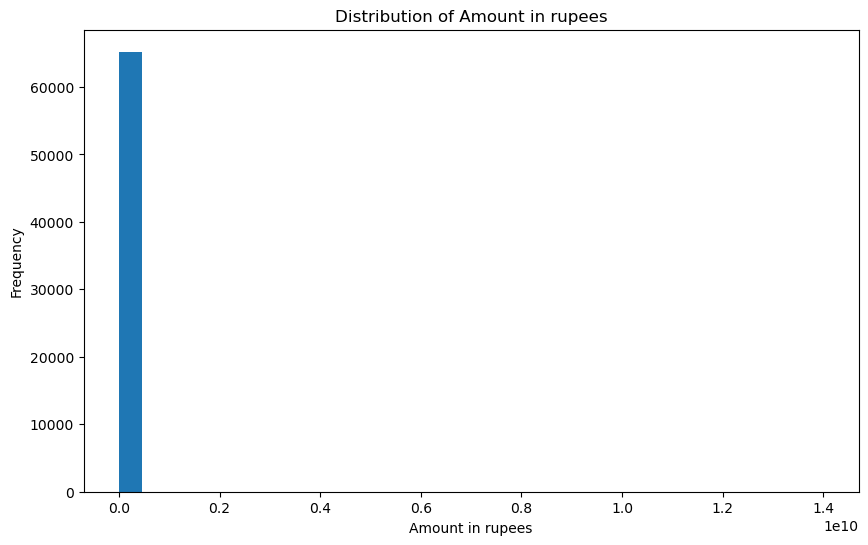

Summary statistics for column Price (in rupees)
count    6.818300e+04
mean     6.873848e+03
std      4.258265e+04
min      0.000000e+00
25%      3.957000e+03
50%      5.357000e+03
75%      7.583772e+03
max      6.700000e+06
Name: Price (in rupees), dtype: float64


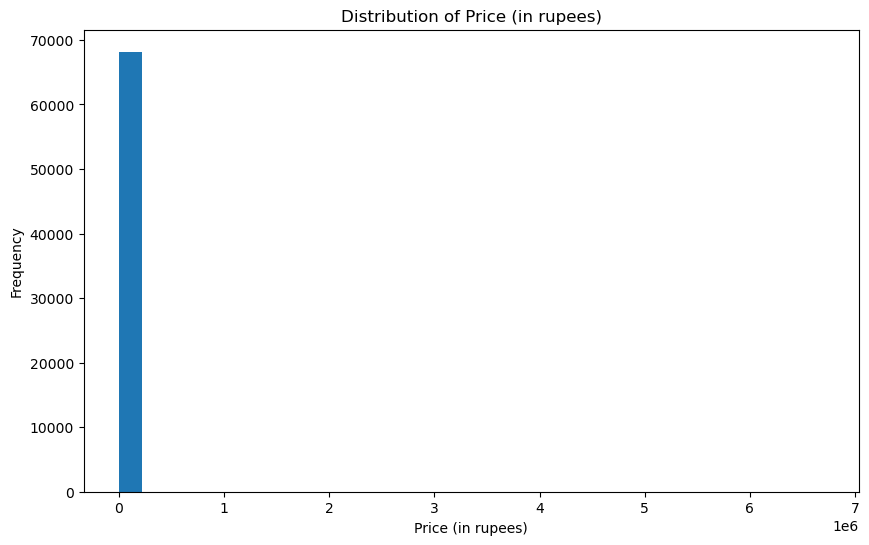

Summary statistics for column Carpet Area in sqft
count     68183.000000
mean       1282.707874
std        3741.375174
min           1.000000
25%        1030.000000
50%        1267.000000
75%        1267.000000
max      709222.000000
Name: Carpet Area in sqft, dtype: float64


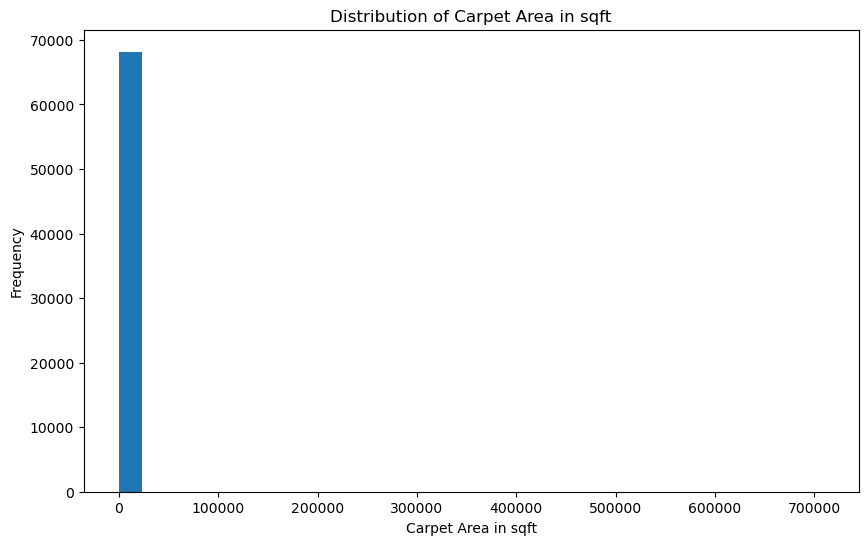

Summary statistics for column Bathroom
count    68183.000000
mean         2.404030
std          0.877477
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: Bathroom, dtype: float64


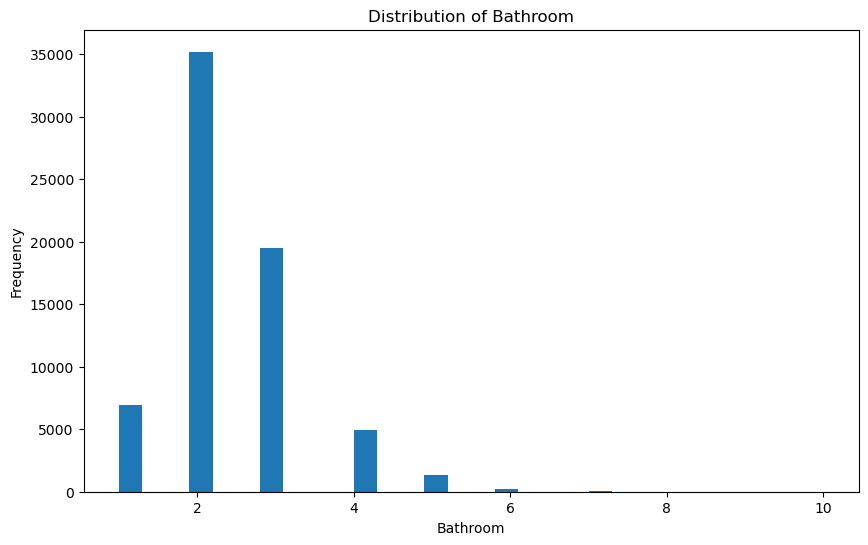

Summary statistics for column Balcony
count    68183.000000
mean         2.060352
std          0.854484
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: Balcony, dtype: float64


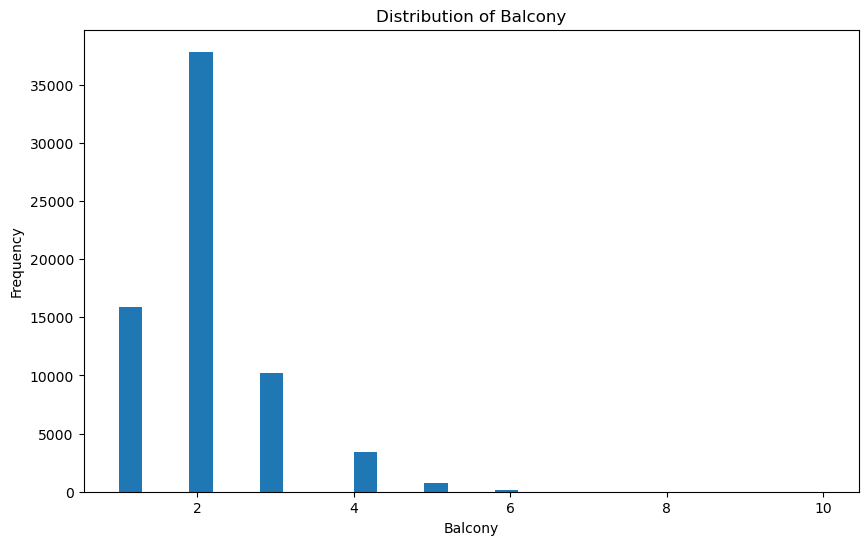

In [ ]:
# Univariate analysis for numeric variables
numeric_columns = ['Amount in rupees', 'Price (in rupees)', 'Carpet Area in sqft', 'Bathroom', 'Balcony']
for column in numeric_columns:
    print("Summary statistics for column", column)
    print(df[column].describe())
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

**BAR PLOT**

Unique values in column Transaction
Resale          50692
New Property    17429
Other              60
Rent/Lease          2
Name: Transaction, dtype: int64


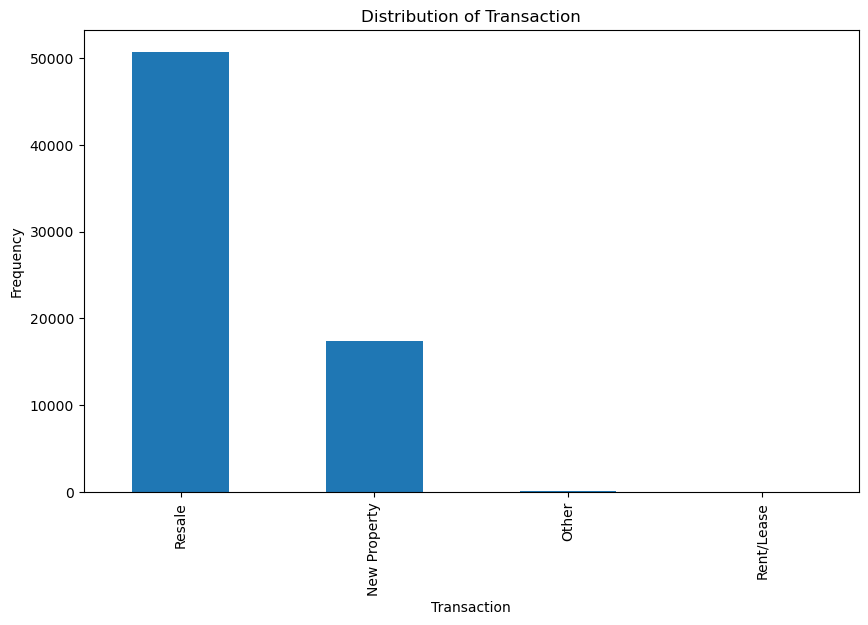

Unique values in column Furnishing
Semi-Furnished    30537
Unfurnished       28530
Furnished          9116
Name: Furnishing, dtype: int64


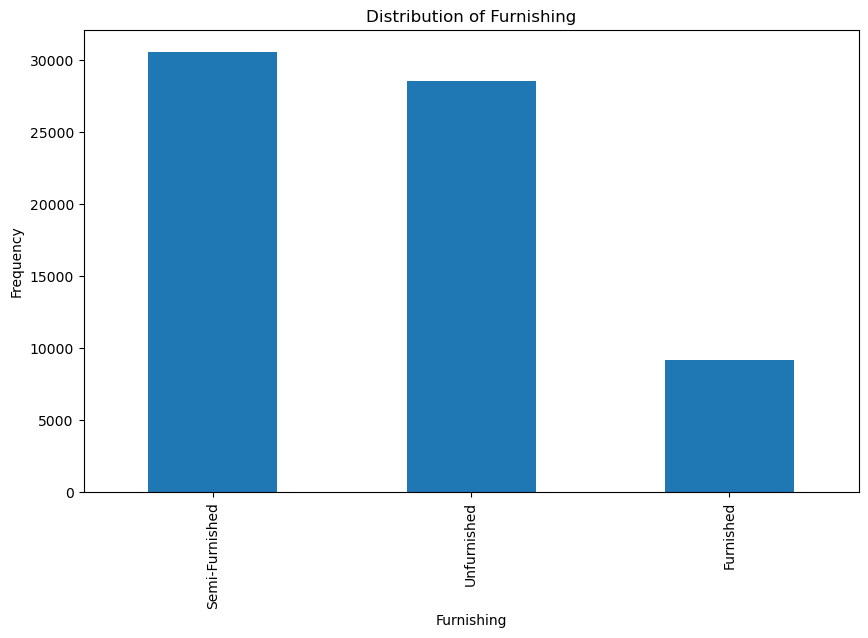

Unique values in column facing
Unknown         26791
East            19000
North - East     8644
North            5642
West             3301
South            1689
South - East     1256
North - West     1189
South -West       671
Name: facing, dtype: int64


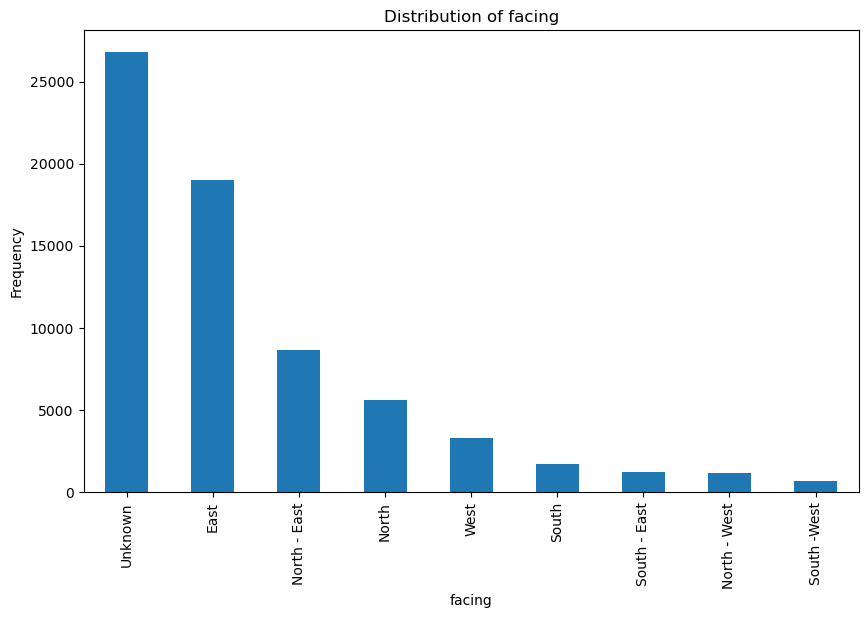

Unique values in column overlooking
Unknown                                        29526
Main Road                                      12245
Garden/Park, Main Road                          8875
Garden/Park                                     8269
Garden/Park, Pool, Main Road                    4735
Pool, Garden/Park, Main Road                    1593
Garden/Park, Pool                               1383
Pool, Garden/Park                                367
Pool                                             355
Main Road, Garden/Park                           351
Main Road, Garden/Park, Pool                     213
Pool, Main Road                                  202
Garden/Park, Main Road, Pool                      37
Main Road, Pool                                   11
Main Road, Pool, Garden/Park                       8
Pool, Main Road, Garden/Park                       6
Main Road, Not Available                           4
Garden/Park, Pool, Main Road, Not Available        1
Garden/Par

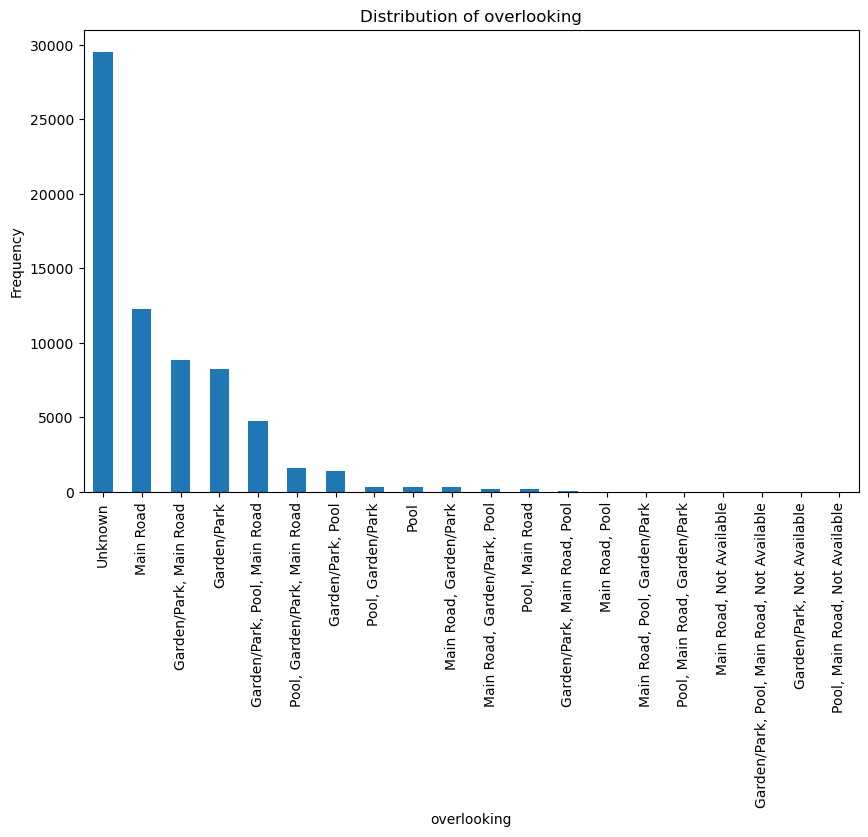

Unique values in column Ownership
Freehold                37341
Unknown                 24919
Leasehold                3070
Co-operative Society     2370
Power Of Attorney         483
Name: Ownership, dtype: int64


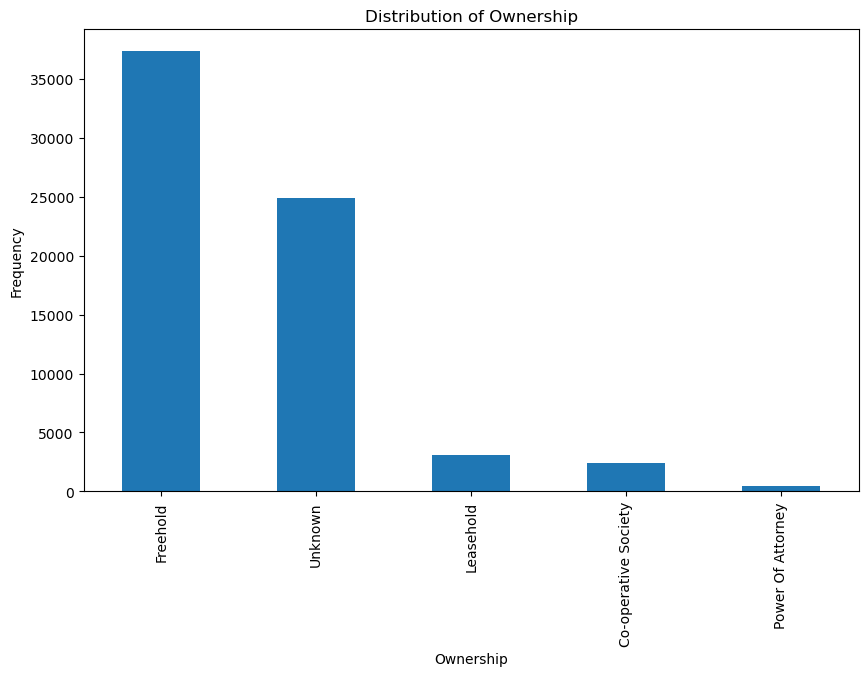

In [ ]:
# Univariate analysis for categorical variables
categorical_columns = ['Transaction', 'Furnishing', 'facing', 'overlooking', 'Ownership']
for column in categorical_columns:
    print("Unique values in column", column)
    print(df[column].value_counts())
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# **BIVARIATE ANALYSIS**

**SCATTER PLOT**

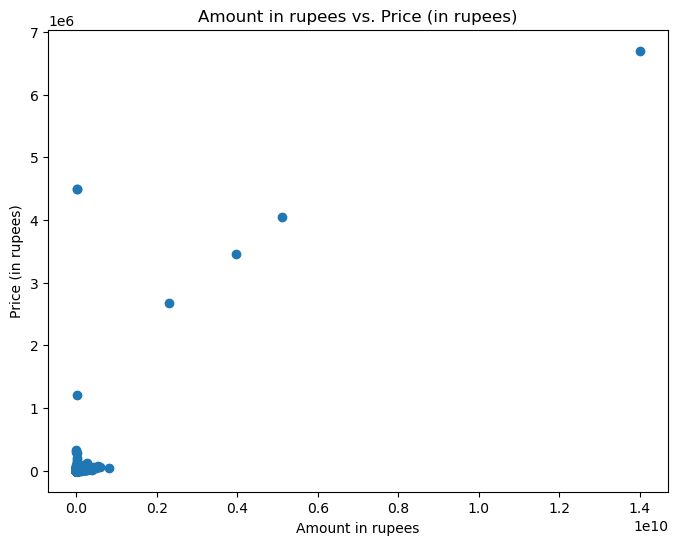

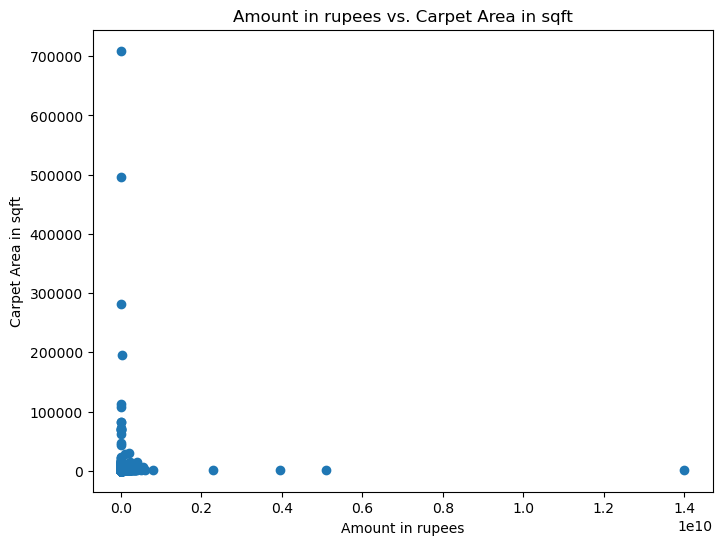

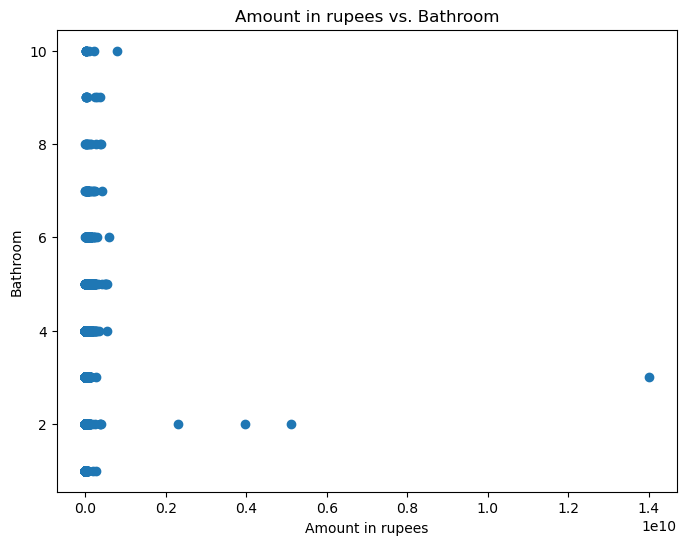

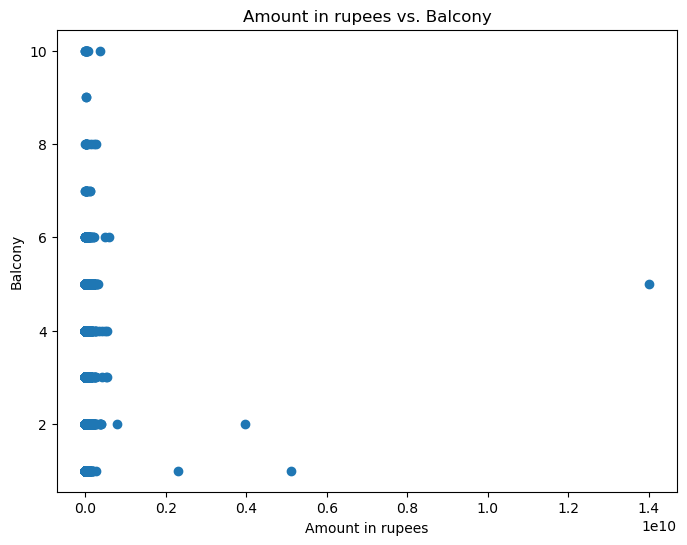

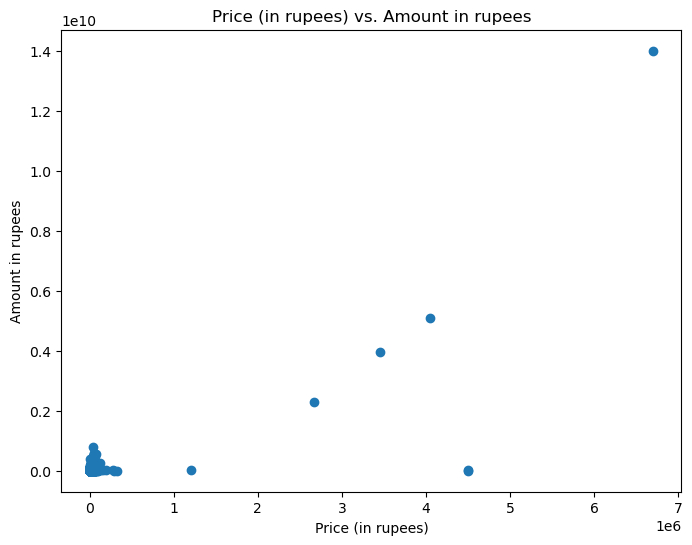

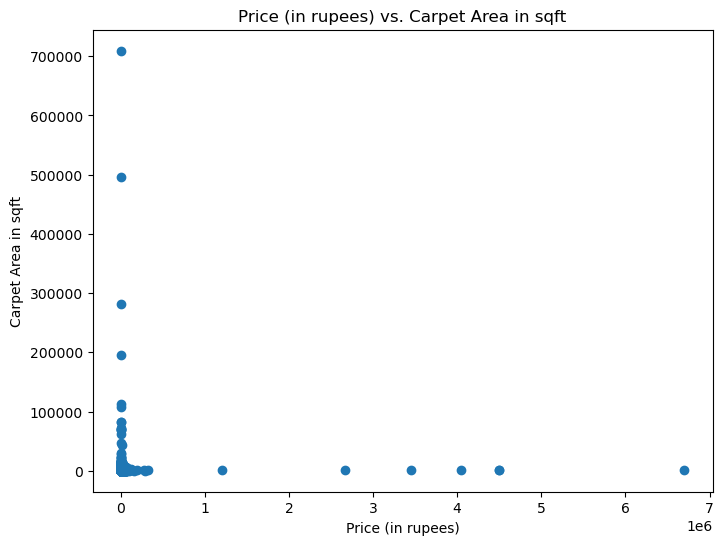

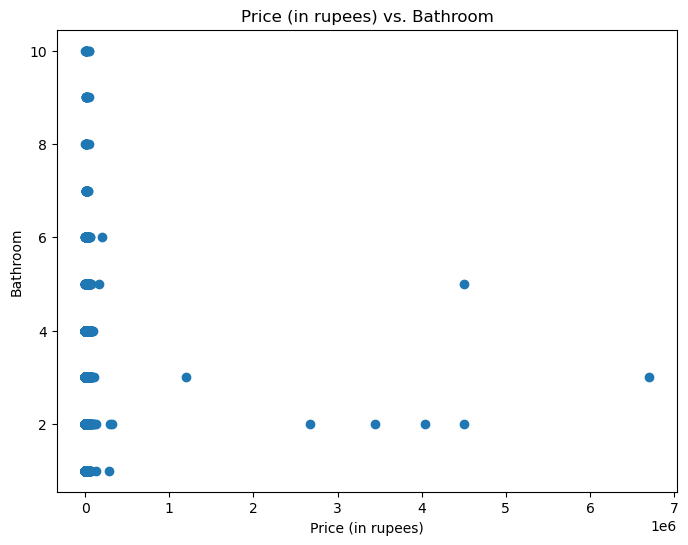

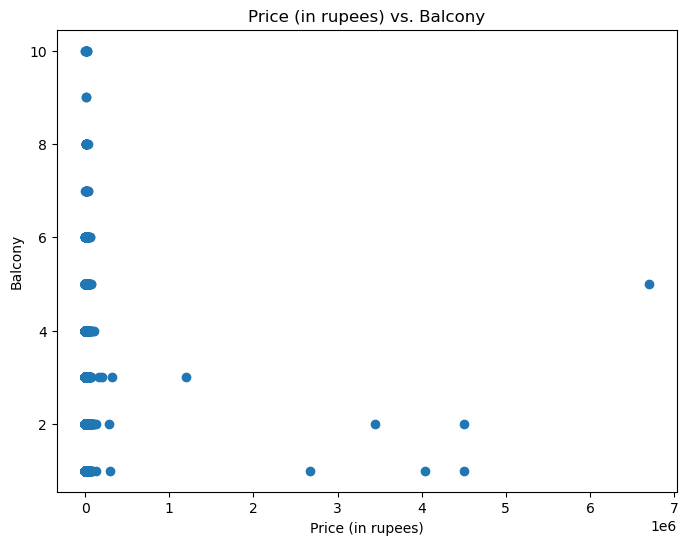

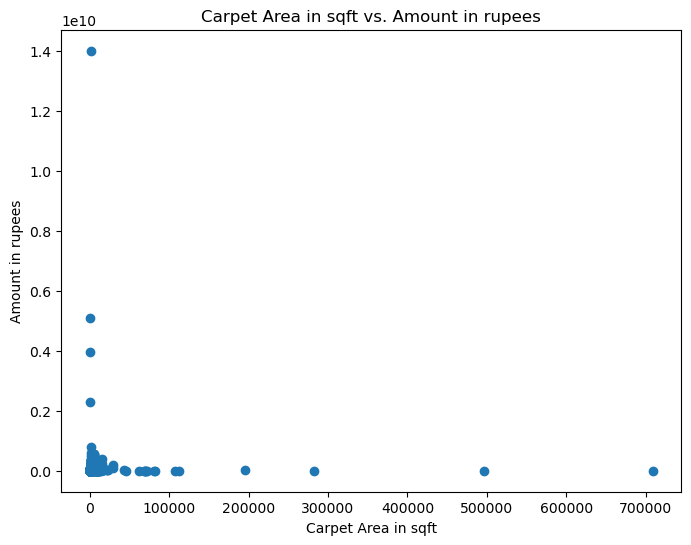

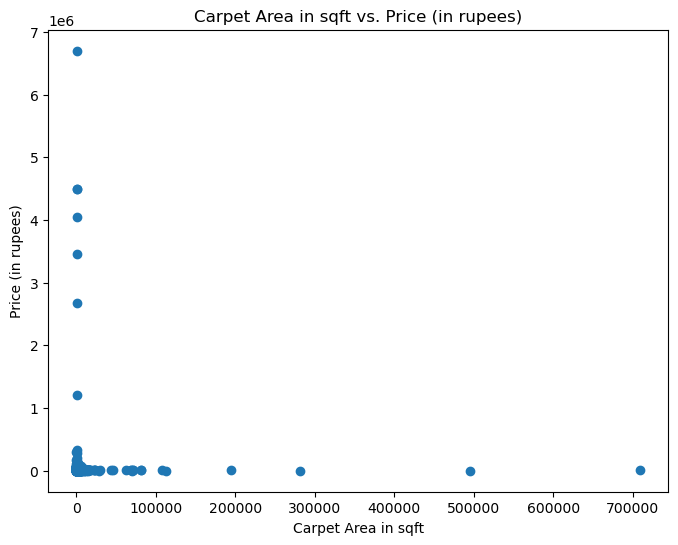

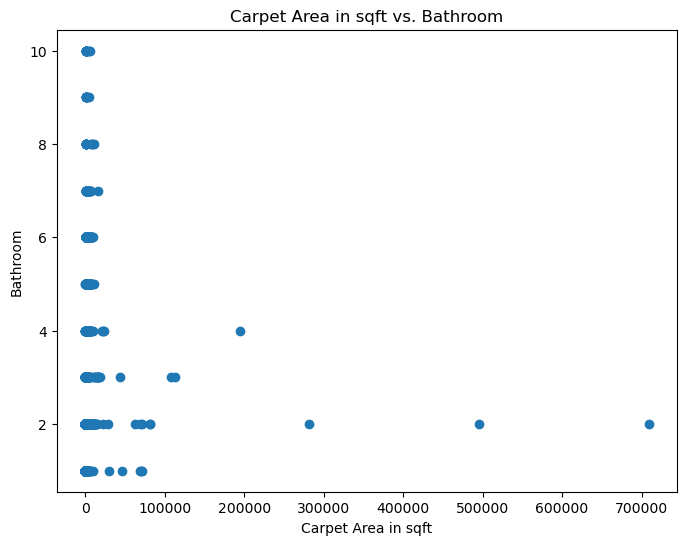

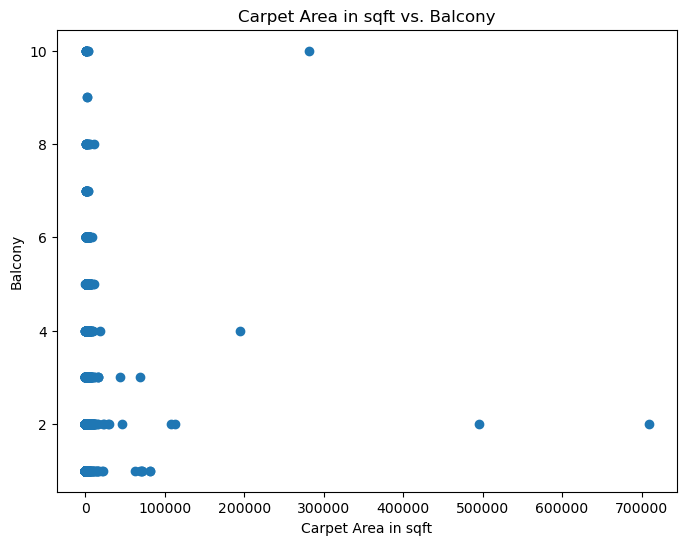

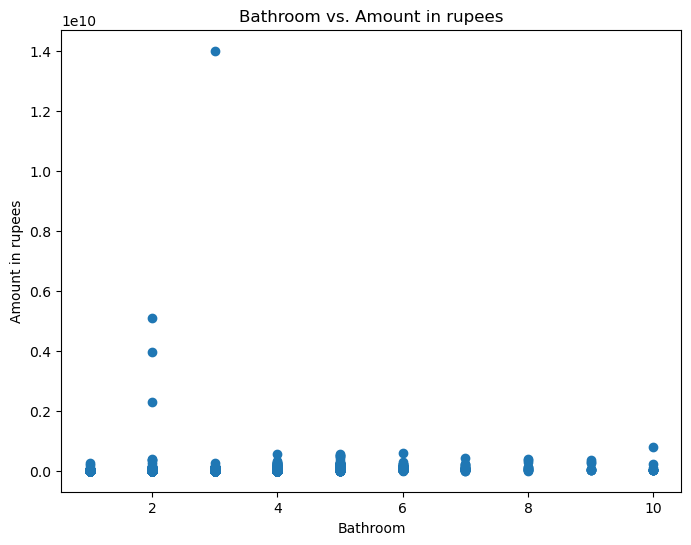

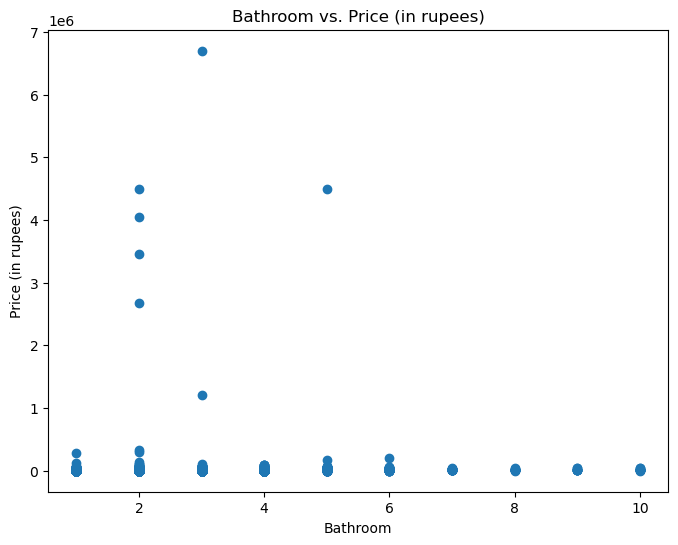

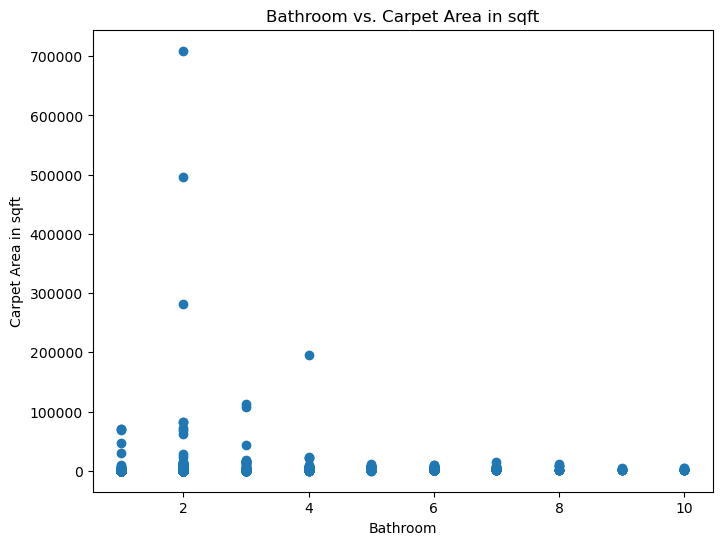

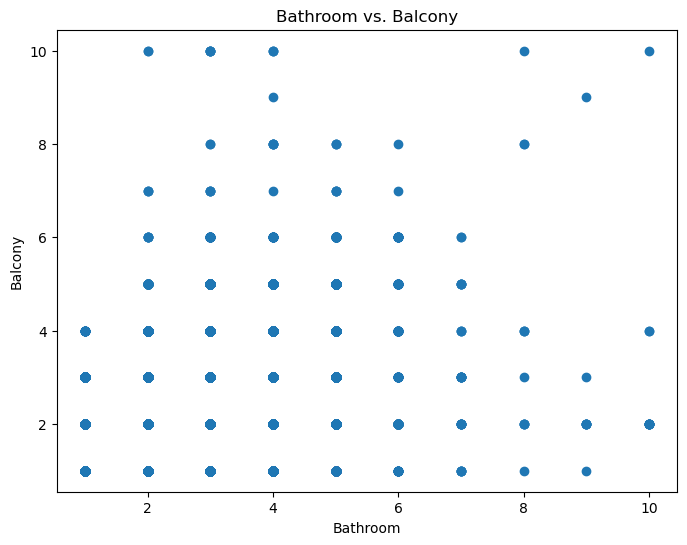

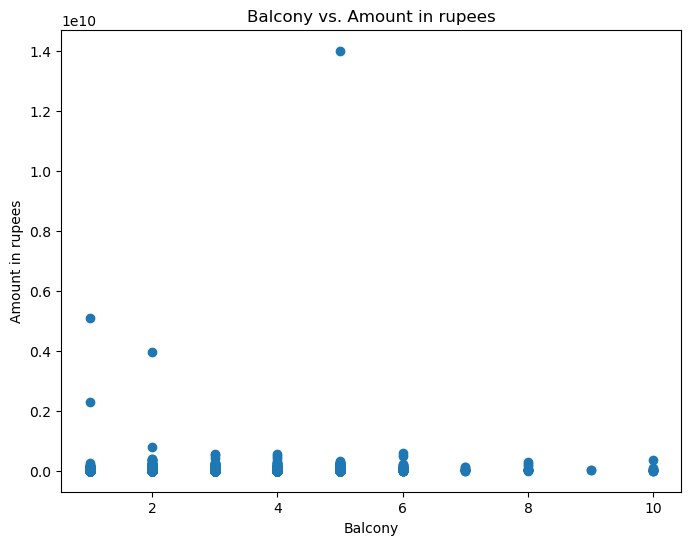

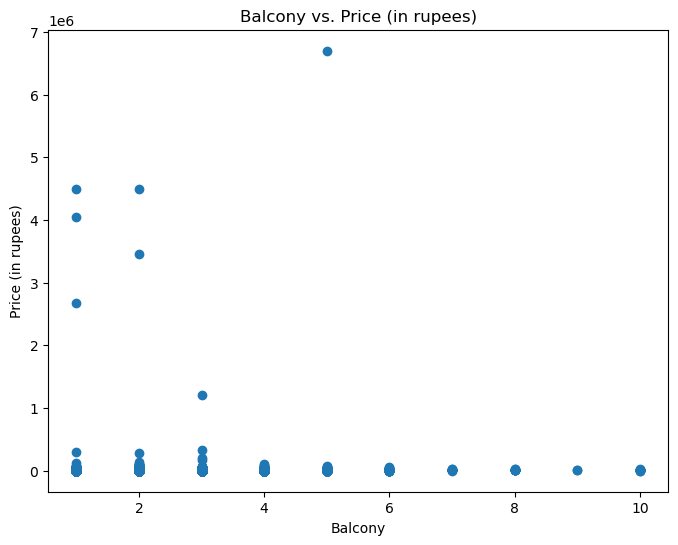

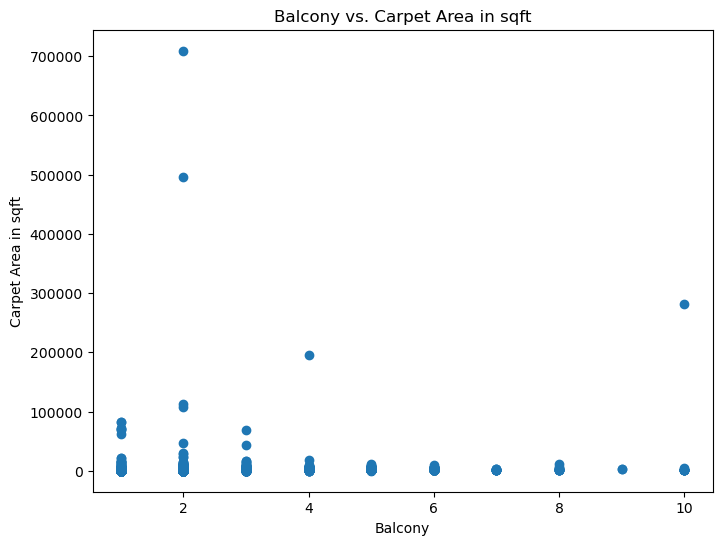

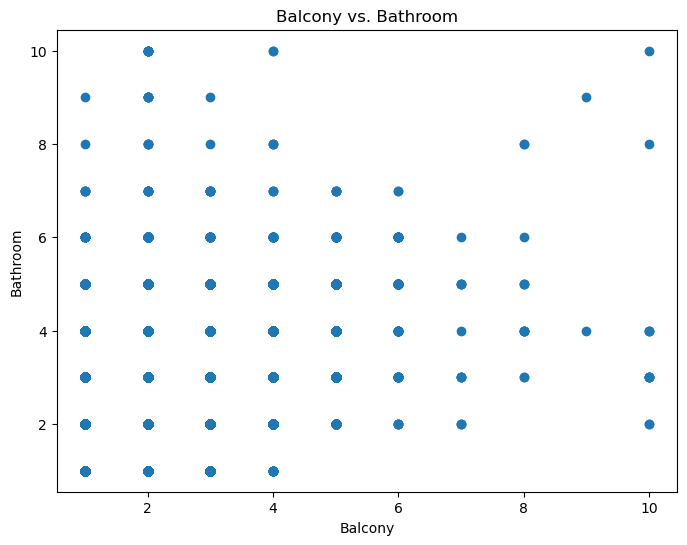

In [ ]:
# Bivariate analysis for numeric vs. numeric variables
numeric_vs_numeric_columns = ['Amount in rupees', 'Price (in rupees)', 'Carpet Area in sqft', 'Bathroom', 'Balcony']
for column1 in numeric_vs_numeric_columns:
    for column2 in numeric_vs_numeric_columns:
        if column1 != column2:
            plt.figure(figsize=(8, 6))
            plt.scatter(df[column1], df[column2])
            plt.title(f"{column1} vs. {column2}")
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()


**PIE CHART**

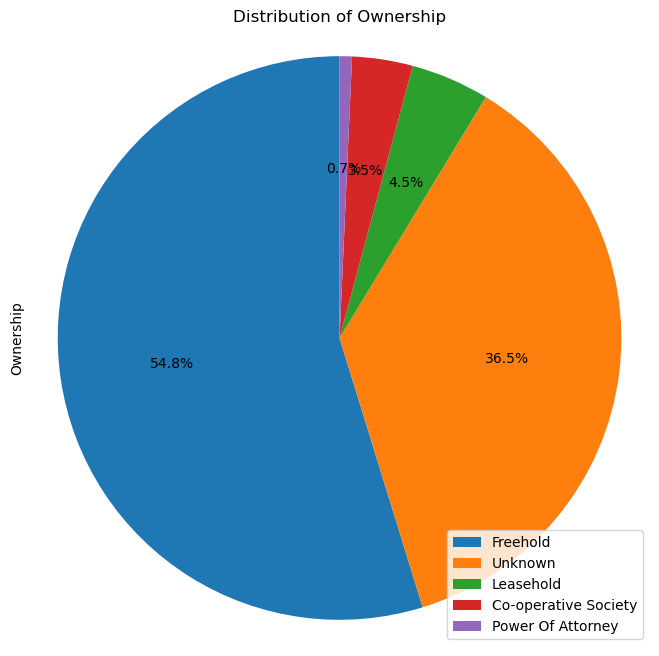

In [ ]:
# Let's plot a pie chart for the 'Ownership' column
plt.figure(figsize=(8, 8))
df['Ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None, startangle=90)
plt.axis('equal')
plt.legend(labels=df['Ownership'].value_counts().index, loc='best')
plt.title("Distribution of Ownership")
plt.show()

# MULTIVARIATE ANALYSIS

**HEAT MAP**

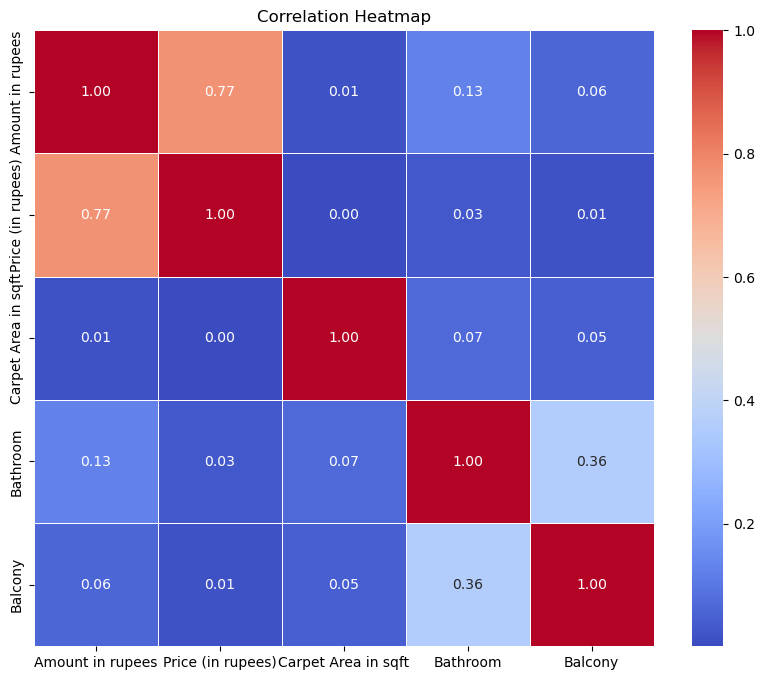

In [ ]:
# Let's plot a heatmap for the correlation matrix of numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**CLUSTER MAP**

<Figure size 1000x800 with 0 Axes>

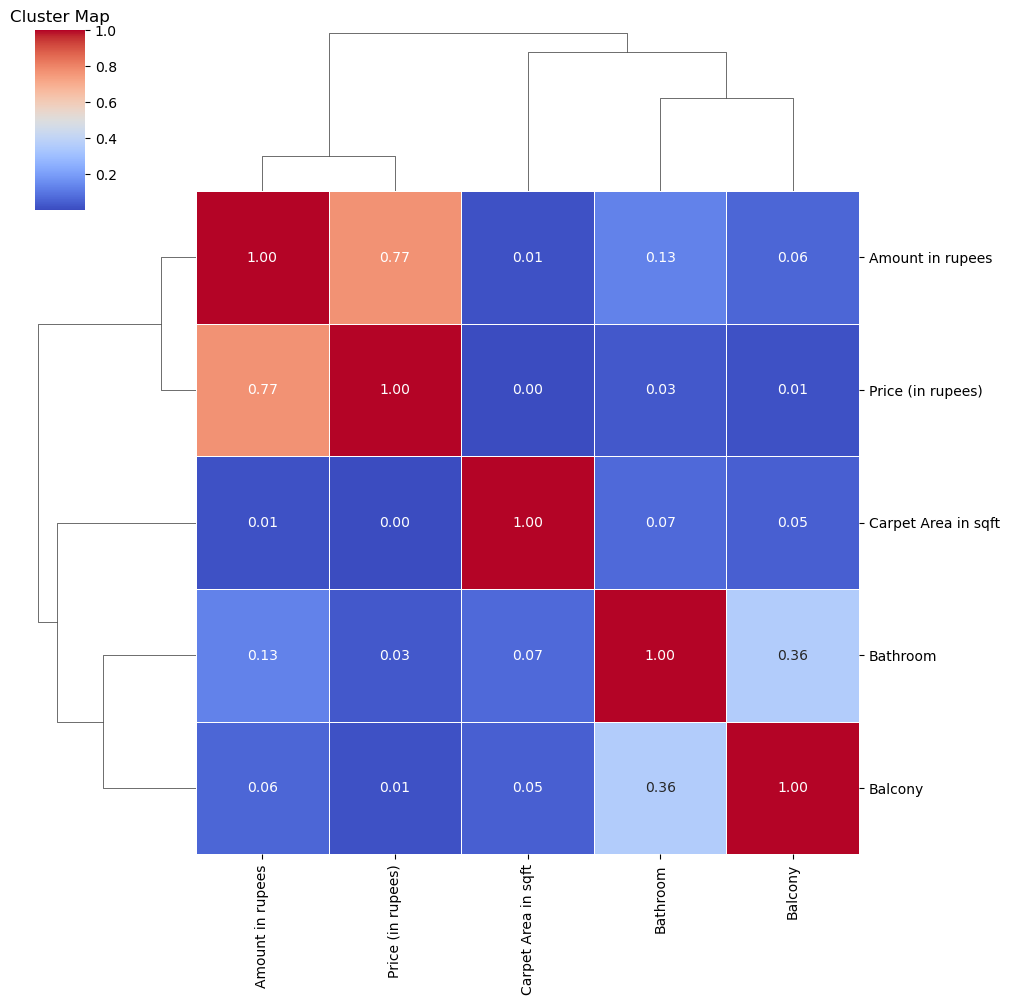

In [ ]:
# Let's plot a cluster map for the correlation matrix of numeric columns
plt.figure(figsize=(10, 8))
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Cluster Map")
plt.show()

# **ML MODELS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68183 entries, 0 to 187530
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                68183 non-null  object 
 1   Description          68183 non-null  object 
 2   Amount in rupees     65248 non-null  float64
 3   Price (in rupees)    68183 non-null  float64
 4   location             68183 non-null  object 
 5   Carpet Area in sqft  68183 non-null  float64
 6   Status               68183 non-null  object 
 7   Floor                68183 non-null  object 
 8   Transaction          68183 non-null  object 
 9   Furnishing           68183 non-null  object 
 10  facing               68183 non-null  object 
 11  overlooking          68183 non-null  object 
 12  Bathroom             68183 non-null  int64  
 13  Balcony              68183 non-null  int64  
 14  Ownership            68183 non-null  object 
dtypes: float64(3), int64(2), object(10)

# **FEATURE SELECTION**

In [ ]:
df.drop(columns=['Title','Description','Status'],inplace=True)

In [ ]:
df.head(3)

,Amount in rupees,Price (in rupees),location,Carpet Area in sqft,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,4200000.0,6000.0,thane,500.0,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1,2,Unknown
1,9800000.0,13799.0,thane,473.0,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold
2,14000000.0,17500.0,thane,779.0,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,2,Freehold


# **LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Function to perform Label Encoding for multiple columns
def label_encode_multiple(df, columns):
    le = LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(df[column])
    return df

label_encode_columns = ['location','Transaction','Floor', 'Furnishing', 'facing', 'overlooking', 'Ownership']
df = label_encode_multiple(df, label_encode_columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68183 entries, 0 to 187530
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Amount in rupees     65248 non-null  float64
 1   Price (in rupees)    68183 non-null  float64
 2   location             68183 non-null  int64  
 3   Carpet Area in sqft  68183 non-null  float64
 4   Floor                68183 non-null  int64  
 5   Transaction          68183 non-null  int64  
 6   Furnishing           68183 non-null  int64  
 7   facing               68183 non-null  int64  
 8   overlooking          68183 non-null  int64  
 9   Bathroom             68183 non-null  int64  
 10  Balcony              68183 non-null  int64  
 11  Ownership            68183 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 6.8 MB


In [ ]:
# Fill NaN values with the mean of the column
mean_value = df['Amount in rupees'].mean()
df['Amount in rupees'].fillna(mean_value, inplace=True)

# **STANDARD SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardization
standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(df)
df = pd.DataFrame(df_standardized, columns=df.columns)

# **DATA SPLITTING**

In [ ]:
X = df.drop(columns=['Amount in rupees'])
y = df['Amount in rupees']

In [ ]:
df

,Amount in rupees,Price (in rupees),location,Carpet Area in sqft,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,-0.105258,-0.020521,1.372398,-0.209205,-1.458109,0.587235,1.04215,1.016936,1.056727,-1.600089,-0.070631,1.284240
1,-0.014288,0.162630,1.372398,-0.216421,0.344345,0.587235,-0.41486,-1.191503,-1.350791,-0.460449,-0.070631,-0.766008
2,0.053940,0.249544,1.372398,-0.134633,-1.394618,0.587235,1.04215,-1.191503,-1.350791,-0.460449,-0.070631,-0.766008
3,-0.132873,0.016672,1.372398,-0.201186,-1.514546,0.587235,1.04215,1.016936,1.056727,-1.600089,-1.240936,1.284240
4,0.086429,0.280636,1.372398,-0.173122,-0.255297,0.587235,1.04215,1.332427,-1.224079,-0.460449,-0.070631,-1.449424
...,...,...,...,...,...,...,...,...,...,...,...,...
68178,-0.071144,-0.085689,1.940784,-0.004198,-0.364644,-1.704705,-0.41486,-1.191503,-1.350791,0.679191,1.099674,-0.766008
68179,-0.084140,-0.084539,1.940784,-0.004198,0.757040,0.587235,1.04215,-0.560521,-1.224079,0.679191,-0.070631,1.284240
68180,-0.050026,-0.059434,1.940784,-0.008742,-1.514546,0.587235,-1.87187,-1.191503,-1.224079,0.679191,-0.070631,-0.766008
68181,-0.124751,-0.062064,1.940784,-0.004198,-0.431663,0.587235,-0.41486,1.016936,-0.463811,-0.460449,-0.070631,1.284240


# **TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# **MODEL BUILDING**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# **MODEL PREDICTION**

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'{model_name}:')
    print(f'R-squared: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print('----------------------------------------')

Linear Regression:
R-squared: 0.40
Mean Absolute Error (MAE): 0.09
Root Mean Squared Error (RMSE): 1.34
----------------------------------------
Random Forest:
R-squared: 0.27
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (RMSE): 1.48
----------------------------------------
Gradient Boosting:
R-squared: 0.21
Mean Absolute Error (MAE): 0.05
Root Mean Squared Error (RMSE): 1.54
----------------------------------------


# Hence, Linear Regression Model Performs better for this data when compared to other models.